In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg
import scipy.sparse as sparse
import scipy.sparse.linalg as linalgs
from matplotlib import animation
from IPython.display import HTML
import scipy.signal as signal

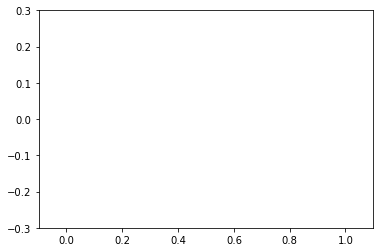

In [76]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.1, 1.1))
ax.set_ylim((- 0.3, 0.3))

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

(0, 1)

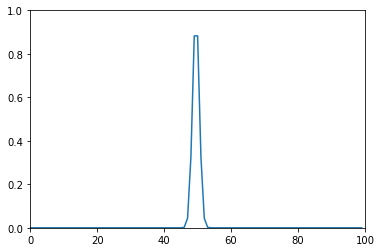

In [73]:
def diff_central(func=None, x=None, dx=None):
    return((func(x + 0.5 * dx) - func(x - 0.5 * dx)) / dx)
w = signal.gaussian(100., 1.)
plt.plot(w)
plt.xlim(0,100)
plt.ylim(0,1)


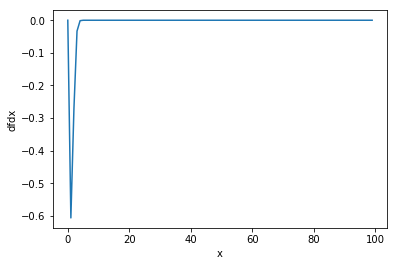

In [72]:
num = len(w)
def gaussian(x):
    return np.exp(-0.5*(np.power(x, 2.)))
x = np.arange(num, dtype = np.float64)
d = gaussian(x = x)
dwdx = diff_central(func = gaussian, x = x, dx = 1.e-5)
plt.plot(x, dwdx)
plt.xlabel('x')
plt.ylabel('dfdx')

In [20]:
class HeatProb():
    def a(self, x=None):
        return(1.) 
    def __init__(self, N=201, **kwargs):
        self.kwargs = kwargs
        self.N = N
        self.h = 1. / (np.float64(N) + 1.)
        self.x = (np.arange(self.N, dtype=np.float64) + 1.) * self.h
        diagonal = ((self.a(self.x - 0.5 * self.h) +
                     self.a(self.x + 0.5 * self.h)) / self.h**2) 
        lower_diagonal = - (self.a(self.x[1:] - 0.5 * self.h)) / self.h**2 
        upper_diagonal = - (self.a(self.x[1:] - 0.5 * self.h)) / self.h**2 
        self.A = sparse.diags(diagonals=[lower_diagonal, diagonal, upper_diagonal],
                              offsets=[-1, 0, 1], shape=(N, N))
    def eig(self):
        vals, vecs = linalg.eig(self.A.toarray())
        isort = np.argsort(vals)
        self.evals = vals[isort]
        self.evecs = vecs[:, isort]
    def set_coeffs(self, a=None, b=None):
        self.a = a
        self.b = b
    def fit_coeffs(self, d=None):
        (u, w, vt) = linalg.svd(self.evecs)
        inz = np.where(w > 1.e-15)[0]
        invw = np.zeros(len(w))
        invw[inz] = 1. / w[inz] 
        einv = vt.transpose().dot(np.diag(invw)).dot(u.transpose())
        return(einv.dot(d)) 
    def frame(self, i):
        period =  2. * np.pi / np.sqrt(self.evals[0])
        t = np.float64(i) / np.float64(nframes) * period * 4
        x = self.x
        coeffs = (self.a * np.cos(np.sqrt(self.evals) * t) +
                  self.b * np.sin(np.sqrt(self.evals) * t))
        y = self.evecs.dot(coeffs).flatten()
        line.set_data(x, y)
        return (line,)

In [21]:
st = HeatProb()
st.eig()
print(st.A.toarray())

[[ 81608. -40804.      0. ...,      0.      0.      0.]
 [-40804.  81608. -40804. ...,      0.      0.      0.]
 [     0. -40804.  81608. ...,      0.      0.      0.]
 ..., 
 [     0.      0.      0. ...,  81608. -40804.      0.]
 [     0.      0.      0. ..., -40804.  81608. -40804.]
 [     0.      0.      0. ...,      0. -40804.  81608.]]


In [15]:
print(st.evals[0:30])

[    9.86940547    39.47523472    88.81032688   157.86274912   246.61579948
   355.04801094   483.13315664   630.84025618   798.13358311   984.97267364
  1191.31233632  1417.10266308  1662.28904121  1926.81216665  2210.60805825
  2513.60807331  2835.73892418  3176.92269594  3537.07686528  3916.11432047
  4313.94338239  4730.46782674  5165.58690731  5619.19538033  6091.18352995
  6581.43719474  7089.83779534  7616.26236314  8160.58356999  8722.66975903]


In [16]:
print(np.sqrt(st.evals[0:30] / st.evals[0]))

[  1.           1.99993953   2.99975813   3.99939533   4.99879069
   5.99788378   6.99661418   7.9949215    8.99274538   9.99002546
  10.98670146  11.9827131   12.97800016  13.97250244  14.96615982
  15.9589122   16.95069957  17.94146193  18.93113939  19.91967209
  20.90700026  21.89306421  22.8778043   23.86116098  24.84307479
  25.82348636  26.80233641  27.77956573  28.75511525  29.72892596]


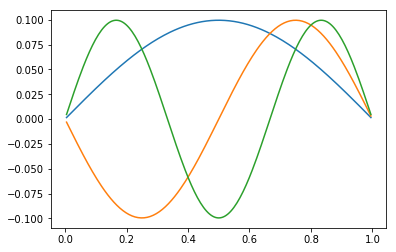

In [17]:
for i in np.arange(3):
    plt.plot(st.x, st.evecs[:, i])

In [78]:
class HeatProb():
    def a(self, x=None):
        return(x**2) 
    def __init__(self, N=201, **kwargs):
        self.kwargs = kwargs
        self.N = N
        self.h = 1. / (np.float64(N) + 1.)
        self.x = (np.arange(self.N, dtype=np.float64) + 1.) * self.h
        diagonal = ((self.a(self.x - 0.5 * self.h) +
                     self.a(self.x + 0.5 * self.h)) / self.h**2) 
        lower_diagonal = - (self.a(self.x[1:] - 0.5 * self.h)) / self.h**2 
        upper_diagonal = - (self.a(self.x[1:] - 0.5 * self.h)) / self.h**2 
        self.A = sparse.diags(diagonals=[lower_diagonal, diagonal, upper_diagonal],
                              offsets=[-1, 0, 1], shape=(N, N))
    def eig(self):
        # Note that the sparse version of "eig" failed here; I know this problem should 
        # yield sines and cosines. A lesson to check your package's performance! So I 
        # work on the full matrix.
        vals, vecs = linalg.eig(self.A.toarray())
        isort = np.argsort(vals)
        self.evals = vals[isort]
        self.evecs = vecs[:, isort]
    def set_coeffs(self, a=None, b=None):
        self.a = a
        self.b = b
    def fit_coeffs(self, d=None):
        (u, w, vt) = linalg.svd(self.evecs)
        inz = np.where(w > 1.e-15)[0]
        invw = np.zeros(len(w))
        invw[inz] = 1. / w[inz] 
        einv = vt.transpose().dot(np.diag(invw)).dot(u.transpose())
        return(einv.dot(d)) 
    def frame(self, i):
        period =  2. * np.pi / np.sqrt(self.evals[0])
        t = np.float64(i) / np.float64(nframes) * period * 4
        x = self.x
        coeffs = (self.a * np.cos(np.sqrt(self.evals) * t) +
                  self.b * np.sin(np.sqrt(self.evals) * t))
        y = self.evecs.dot(coeffs).flatten()
        line.set_data(x, y)
        return (line,)

In [79]:
st = HeatProb()
st.eig()
print(st.A.toarray())

[[  2.50000000e+00  -2.25000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.25000000e+00   8.50000000e+00  -6.25000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -6.25000000e+00   1.85000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   7.92025000e+04
   -3.98002500e+04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -3.98002500e+04
    8.00005000e+04  -4.02002500e+04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   -4.02002500e+04   8.08025000e+04]]


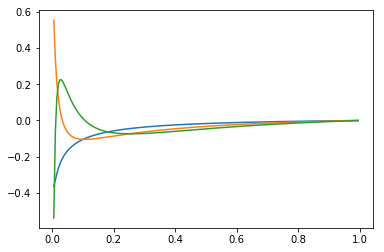

In [80]:
for i in np.arange(3):
    plt.plot(st.x, st.evecs[:, i])

In [ ]:
#I wasn't sure how to include the gaussian. I can't find the 
#corresponding spot in the code for a String. 
#Also, I thought I uploaded this on Friday, when it was due, but I think I forgot to press the final upload button, so it never 
#went onto github.